In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
# Load data
df = pd.read_csv('Iris.csv',index_col=0)

print('Data:')
print(df.head(), end='\n\n')

# Preprocess data

# check if there are missing values
print(df.isnull().sum(), end='\n\n')

# check if there are non-numerical features
print(df.info())



Data:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float6

# Use One hot encoding to differenciate between species in graphs.

In [43]:
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()
species_encoded=encoding.fit(df['Species']).transform(df['Species'])
species_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

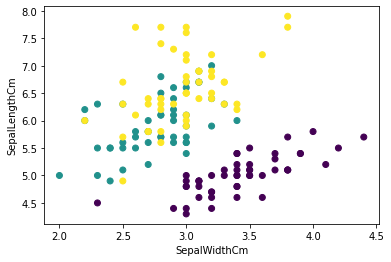

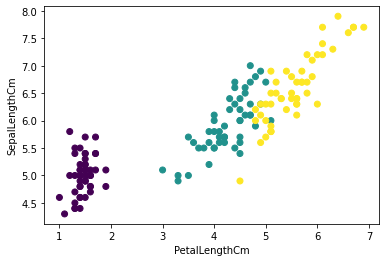

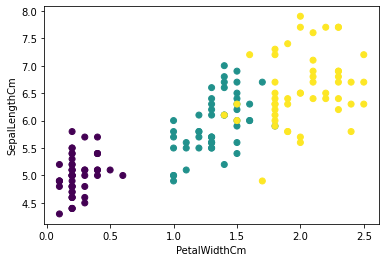

In [44]:
# explore the continuous independent features (SepalLengthCm vs the rest)

for f in df.columns[1:-1]:
  plt.scatter(df[f], df['SepalLengthCm'], c = species_encoded)
  plt.xlabel(f)
  plt.ylabel('SepalLengthCm')
  plt.show()

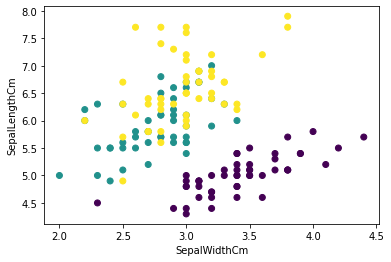

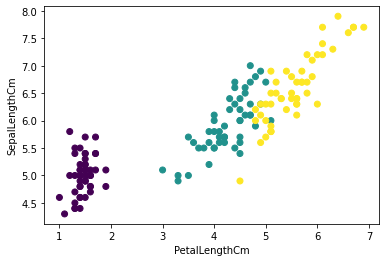

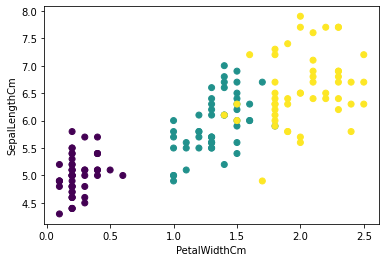

In [45]:
# explore the continuous independent features (SepalLengthCm vs the rest)

for f in df.columns[1:-1]:
  plt.scatter(df[f], df['SepalLengthCm'],c = species_encoded)
  plt.xlabel(f)
  plt.ylabel('SepalLengthCm')
  plt.show()

# Plot each variation in a scatter plot.

## SepalLenghtCm vs SepalWidthCm
## SepalWidthCm vs PetalLengthCm    
## PetalLengthCm vs SepalLenghtCm
## petalWidthCm vs SepalLenghtCm
## PetalWidthCm vs SepalWidthCm
## PetalWidthCm vs PetalLenghtCm

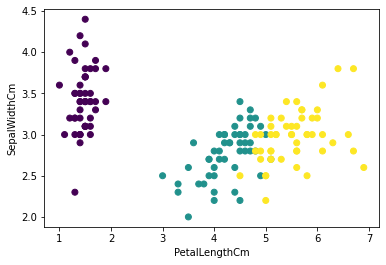

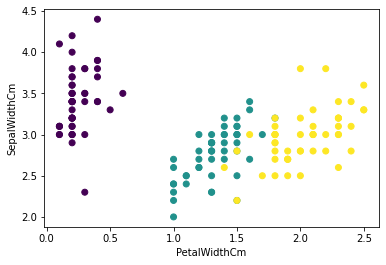

In [46]:
# explore the continuous independent features (SepalWidthCm vs the rest)
for f in df.columns[2:-1]:
  plt.scatter(df[f], df['SepalWidthCm'], c = species_encoded)
  plt.xlabel(f)
  plt.ylabel('SepalWidthCm')
  plt.show()

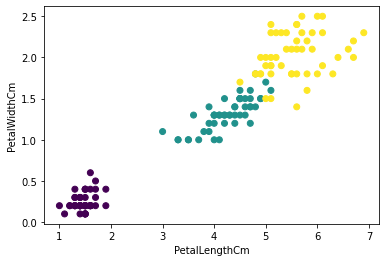

In [47]:
# explore the continuous independent features (SepalWidthCm vs the rest)
for f in df.columns[2:3]:
  plt.scatter(df[f], df['PetalWidthCm'], c = species_encoded)
  plt.xlabel(f)
  plt.ylabel('PetalWidthCm')
  plt.show()

### PetalLengthCm vs SepalLenghtCm seems to be the best option. With PetalLengthCm vs PetalWidthCm also looking promising. We will use these to for our K-Means Clusters.

### We wil be doing comparisons with K = 3

Selecting K for PetalLenghtCm vs SeplaLenghtCm

In [50]:
# prepare data for training, note that we do not supply y in an unsupervised task (which is why it is called unsupervised).
X = df[['PetalLengthCm','SepalLengthCm']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

Data size:
(150, 2)


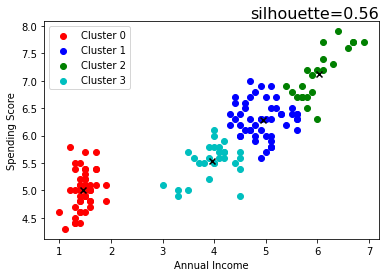

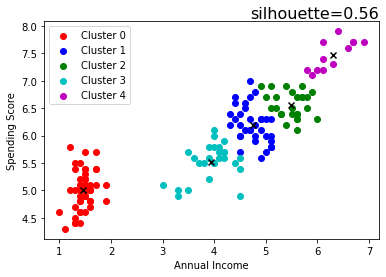

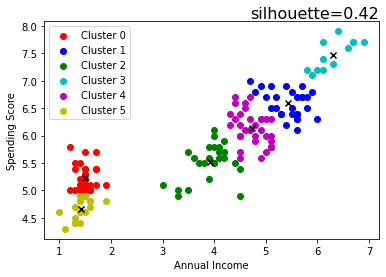

In [52]:
def scatter_Kmeans(x, k = 3, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()

for k in range(4,7):
  scatter_Kmeans(X, k, r=0)
  

### Selecting k for PetalWidthCm vs SeplaWidthCm

In [53]:
# prepare data for training, note that we do not supply y in an unsupervised task (which is why it is called unsupervised).
X_1 = df[['PetalWidthCm','SepalLengthCm']].values.reshape(-1,2)  

print('Data size:')
print(X_1.shape)

Data size:
(150, 2)


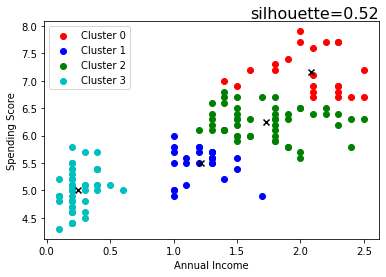

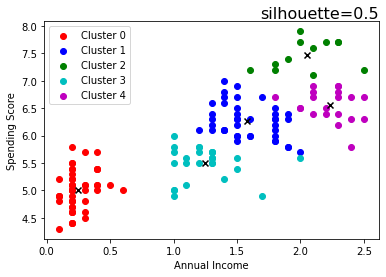

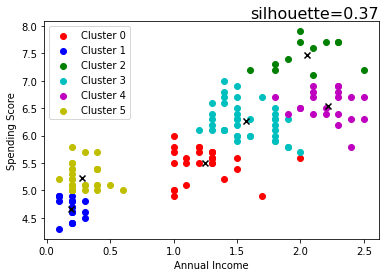

In [54]:
def scatter_Kmeans(x, k = 3, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()

for k in range(4,7):
  scatter_Kmeans(X_1, k, r=0)